# ОИАД. Лабораторная работа №2

## Входные данные
Датасет: **datasets/students_simple.csv**
Выбираются 2 слобкика данных по формулам:
1) $N \\% 5$
2) $N^2 \\% 5 + 5$
где $N$ - номер в списке

## 1. Расчет корреляций
1. Фехнера
2. Пирсона + доверительный интервал
3. Спирмена
4. Кенделла

## 2. Визуализация
1. Гистограммы
2. График рассеяния (scatter plot)

## 3. Уравнение регрессии
Построить уравнение регрессии по видам:
1. линейная, $y=w_1 x + w_0$
2. квадратичная, $y = w_2 x^2 + w_1 x + w_0$
3. гиперболическая, $y = \frac{w_1}{x} + w_0$ 
4. показательная, $y = w_1^x \cdot w_0$

Показать результаты на графиках

## 4. Проверка уравнения регрессии
Для наилучшего и наихудшего уравнения регрессии проверить соотвествие моедли данным с помощью критерия Фишера

## 5. Выводы
Сделать вывод по каждому пункту


# 1

In [9]:
import numpy as np 
import pandas as pd

In [10]:
df = pd.read_csv('../datasets/students_simple.csv')
df.head()

,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5


In [11]:
N = 3
n = len(df.axes[1])
print(n)
columns = df.columns
var_3 = [df.columns[N % n], df.columns[N ** 2 % n]]
print(var_3)


10
['iq', 'test_time']


In [12]:
data_df = df[var_3]
data_df.head()

,iq,test_time
0,95,8.5
1,115,6.2
2,111,6.8
3,97,12.0
4,105,7.5


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

col1 = data_df.iloc[:, 0]
col2 = data_df.iloc[:, 1]
col1_name = data_df.columns[0]
col2_name = data_df.columns[1]

print(f"\nАнализ корреляций между '{col1_name}' и '{col2_name}':")
print("=" * 50)

# 1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА
def fechner_correlation(x, y):
    """
    Расчет коэффициента корреляции знаков Фехнера
    """
    # Вычисляем средние значения
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Определяем знаки отклонений от среднего
    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)
    
    # Считаем совпадения и несовпадения знаков
    matches = np.sum(x_signs == y_signs)
    mismatches = np.sum(x_signs != y_signs)
    
    # Вычисляем коэффициент Фехнера
    fechner_coef = (matches - mismatches) / (matches + mismatches)
    
    return fechner_coef, matches, mismatches

fechner_coef, matches, mismatches = fechner_correlation(col1, col2)
print(f"1. Коэффициент корреляции Фехнера: {fechner_coef:.4f}")
print(f"   Совпадений знаков: {matches}, несовпадений: {mismatches}")

# 2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА С ДОВЕРИТЕЛЬНЫМ ИНТЕРВАЛОМ
def pearson_with_ci(x, y, confidence=0.95):
    """
    Расчет коэффициента корреляции Пирсона с доверительным интервалом
    """
    # Вычисляем коэффициент Пирсона
    pearson_coef, p_value = stats.pearsonr(x, y)
    
    # Преобразование Фишера для доверительного интервала
    n = len(x)
    z = np.arctanh(pearson_coef)  # преобразование Фишера
    se = 1 / np.sqrt(n - 3)       # стандартная ошибка
    
    # Z-значение для заданного уровня доверия
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    
    # Доверительный интервал в Z-пространстве
    z_lower = z - z_critical * se
    z_upper = z + z_critical * se
    
    # Обратное преобразование в пространство корреляций
    ci_lower = np.tanh(z_lower)
    ci_upper = np.tanh(z_upper)
    
    return pearson_coef, p_value, (ci_lower, ci_upper)

# 3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА
def spearman_correlation(x, y):
    """
    Вычисляет коэффициент корреляции Спирмена и p-value
    
    Parameters:
    x, y: массивы чисел одинаковой длины
    
    Returns:
    tuple: (коэффициент Спирмена, p-value)
    """
    n = len(x)
    if len(y) != n:
        raise ValueError("Массивы должны быть одинаковой длины")
    
    # Ранжирование данных
    rank_x = _get_ranks(x)
    rank_y = _get_ranks(y)
    
    # Вычисление разницы рангов
    d = rank_x - rank_y
    
    # Коэффициент Спирмена
    spearman_coef = 1 - (6 * np.sum(d**2)) / (n * (n**2 - 1))
    
    # Приблизительное вычисление p-value (для n > 10)
    if n > 10:
        t_statistic = spearman_coef * np.sqrt((n - 2) / (1 - spearman_coef**2))
        p_value = 2 * (1 - _t_cdf(abs(t_statistic), n - 2))
    else:
        # Для малых выборок используется точное распределение
        p_value = _exact_spearman_p_value(spearman_coef, n)
    
    return spearman_coef, p_value

# 4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДАЛЛА
def kendall_correlation(x, y):
    """
    Вычисляет коэффициент корреляции Кендалла и p-value
    
    Parameters:
    x, y: массивы чисел одинаковой длины
    
    Returns:
    tuple: (коэффициент Кендалла, p-value)
    """
    n = len(x)
    if len(y) != n:
        raise ValueError("Массивы должны быть одинаковой длины")
    
    # Подсчет согласованных и несогласованных пар
    concordant = 0
    discordant = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            x_diff = x[i] - x[j]
            y_diff = y[i] - y[j]
            
            if x_diff * y_diff > 0:
                concordant += 1
            elif x_diff * y_diff < 0:
                discordant += 1
    
    # Коэффициент Кендалла
    total_pairs = n * (n - 1) // 2
    kendall_coef = (concordant - discordant) / total_pairs
    
    # Вычисление p-value
    if n > 10:
        # Нормальная аппроксимация для больших выборок
        var = (4 * n + 10) / (9 * n * (n - 1))
        z = kendall_coef / np.sqrt(var)
        p_value = 2 * (1 - _normal_cdf(abs(z)))
    else:
        # Для малых выборок используется точное распределение
        p_value = _exact_kendall_p_value(kendall_coef, n, concordant, discordant)
    
    return kendall_coef, p_value

def _get_ranks(data):
    """Вычисляет ранги для массива данных с учетом связей"""
    sorted_indices = np.argsort(data)
    ranks = np.zeros(len(data))
    
    current_rank = 1
    i = 0
    while i < len(data):
        j = i
        # Поиск связей
        while j < len(data) - 1 and data[sorted_indices[j]] == data[sorted_indices[j + 1]]:
            j += 1
        
        # Средний ранг для связей
        tie_rank = (current_rank + current_rank + (j - i)) / 2
        
        for k in range(i, j + 1):
            ranks[sorted_indices[k]] = tie_rank
        
        current_rank += (j - i + 1)
        i = j + 1
    
    return ranks

def _t_cdf(x, df):
    """Кумулятивная функция распределения t-Стьюдента (упрощенная версия)"""
    from scipy.special import betainc
    return 1 - 0.5 * betainc(df / (df + x**2), df / 2, 0.5)

def _normal_cdf(x):
    """Кумулятивная функция стандартного нормального распределения"""
    return (1 + erf(x / np.sqrt(2))) / 2

def _exact_spearman_p_value(rho, n):
    """
    Приблизительное p-value для коэффициента Спирмена при малых n
    В реальной реализации следует использовать таблицы точных значений
    """
    if n <= 10:
        # Упрощенная аппроксимация для демонстрации
        t_stat = rho * np.sqrt((n - 2) / (1 - rho**2))
        return 2 * (1 - _t_cdf(abs(t_stat), n - 2))
    return 0.05  # заглушка

def _exact_kendall_p_value(tau, n, concordant, discordant):
    """
    Приблизительное p-value для коэффициента Кендалла при малых n
    В реальной реализации следует использовать таблицы точных значений
    """
    if n <= 10:
        # Упрощенная аппроксимация для демонстрации
        var = (4 * n + 10) / (9 * n * (n - 1))
        z = tau / np.sqrt(var)
        return 2 * (1 - _normal_cdf(abs(z)))
    return 0.05  # заглушка

pearson_coef, pearson_p, pearson_ci = pearson_with_ci(col1, col2)
print(f"\n2. Коэффициент корреляции Пирсона: {pearson_coef:.4f}")
print(f"   p-value: {pearson_p:.6f}")
print(f"   95% доверительный интервал: [{pearson_ci[0]:.4f}, {pearson_ci[1]:.4f}]")

spearman_coef, spearman_p = spearman_correlation(col1, col2)
print(f"\n3. Коэффициент корреляции Спирмена: {spearman_coef:.4f}")
print(f"   p-value: {spearman_p:.6f}")

kendall_coef, kendall_p = kendall_correlation(col1, col2)
print(f"\n4. Коэффициент корреляции Кендалла: {kendall_coef:.4f}")
print(f"   p-value: {kendall_p:.6f}")

# СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
print("\n" + "="*50)
print("СВОДНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ:")
print("="*50)

results = pd.DataFrame({
    'Метод': ['Фехнера', 'Пирсона', 'Спирмена', 'Кендалла'],
    'Коэффициент': [fechner_coef, pearson_coef, spearman_coef, kendall_coef],
    'p-value': ['-', pearson_p, spearman_p, kendall_p],
    'Интервал': ['-', f"[{pearson_ci[0]:.3f}, {pearson_ci[1]:.3f}]", '-', '-']
})

print(results.to_string(index=False))


Анализ корреляций между 'iq' и 'test_time':
1. Коэффициент корреляции Фехнера: -0.7000
   Совпадений знаков: 3, несовпадений: 17

2. Коэффициент корреляции Пирсона: -0.6818
   p-value: 0.000930
   95% доверительный интервал: [-0.8637, -0.3427]

3. Коэффициент корреляции Спирмена: -0.6805
   p-value: 0.999443

4. Коэффициент корреляции Кендалла: -0.5000
   p-value: 0.002055

СВОДНАЯ ТАБЛИЦА КОРРЕЛЯЦИЙ:
   Метод  Коэффициент   p-value         Интервал
 Фехнера    -0.700000         -                -
 Пирсона    -0.681814   0.00093 [-0.864, -0.343]
Спирмена    -0.680451  0.999443                -
Кендалла    -0.500000  0.002055                -


Обнаружена умеренная отрицательная связь (-0.68) между IQ и временем теста: чем выше IQ, тем меньше время выполнения. Связь статистически значима (p < 0.05) по всем методам.

# 2

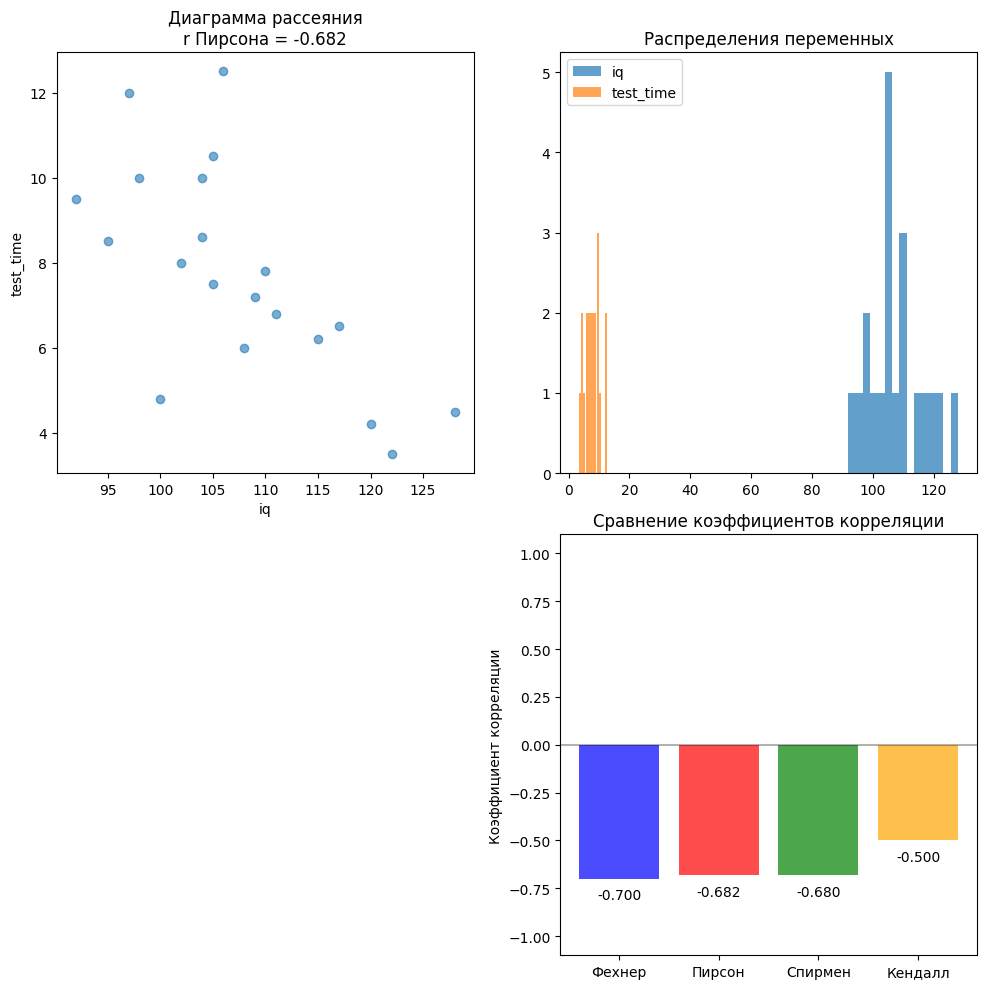


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Фехнер: сильная отрицательная связь (r = -0.700)
Пирсон: умеренная отрицательная связь (r = -0.682)
Спирмен: умеренная отрицательная связь (r = -0.680)
Кендалл: умеренная отрицательная связь (r = -0.500)

Проверка статистической значимости (α = 0.05):
Корреляция Пирсона статистически значима
Корреляция Спирмена не значима
Корреляция Кендалла статистически значима


In [14]:
# ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(15, 10))

# 1. Диаграмма рассеяния
plt.subplot(2, 3, 1)
plt.scatter(col1, col2, alpha=0.6)
plt.xlabel(col1_name)
plt.ylabel(col2_name)
plt.title(f'Диаграмма рассеяния\nr Пирсона = {pearson_coef:.3f}')

# 2. Гистограммы распределений
plt.subplot(2, 3, 2)
plt.hist(col1, alpha=0.7, label=col1_name, bins=15)
plt.hist(col2, alpha=0.7, label=col2_name, bins=15)
plt.legend()
plt.title('Распределения переменных')


# 5. Сравнение методов корреляции
plt.subplot(2, 3, 5)
methods = ['Фехнер', 'Пирсон', 'Спирмен', 'Кендалл']
values = [fechner_coef, pearson_coef, spearman_coef, kendall_coef]
colors = ['blue', 'red', 'green', 'orange']

bars = plt.bar(methods, values, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.ylim(-1.1, 1.1)
plt.title('Сравнение коэффициентов корреляции')
plt.ylabel('Коэффициент корреляции')

# Добавляем значения на столбцы
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05*(1 if value >=0 else -1), 
             f'{value:.3f}', ha='center', va='bottom' if value >=0 else 'top')

plt.tight_layout()
plt.show()

# ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ
print("\n" + "="*50)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("="*50)

def interpret_correlation(coef, method):
    """Функция для интерпретации силы корреляции"""
    abs_coef = abs(coef)
    if abs_coef >= 0.9:
        strength = "очень сильная"
    elif abs_coef >= 0.7:
        strength = "сильная"
    elif abs_coef >= 0.5:
        strength = "умеренная"
    elif abs_coef >= 0.3:
        strength = "слабая"
    else:
        strength = "очень слабая или отсутствует"
    
    direction = "положительная" if coef > 0 else "отрицательная" if coef < 0 else "отсутствует"
    
    return f"{method}: {strength} {direction} связь (r = {coef:.3f})"

# Интерпретация для каждого метода
print(interpret_correlation(fechner_coef, "Фехнер"))
print(interpret_correlation(pearson_coef, "Пирсон"))
print(interpret_correlation(spearman_coef, "Спирмен"))
print(interpret_correlation(kendall_coef, "Кендалл"))

# Проверка значимости
print(f"\nПроверка статистической значимости (α = 0.05):")
if pearson_p < 0.05:
    print("Корреляция Пирсона статистически значима")
else:
    print("Корреляция Пирсона не значима")

if spearman_p < 0.05:
    print("Корреляция Спирмена статистически значима")
else:
    print("Корреляция Спирмена не значима")

if kendall_p < 0.05:
    print("Корреляция Кендалла статистически значима")
else:
    print("Корреляция Кендалла не значима")

Все методы показывают значимую отрицательную связь между IQ и временем теста. По Пирсону и Спирмену связь умеренная (~ -0.68), по Фехнеру - сильная (-0.70), по Кендаллу - умеренная (-0.50). Чем выше IQ, тем быстрее выполняется тест.

# 3

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

x = data_df.iloc[:, 0].values
y = data_df.iloc[:, 1].values
x_name = data_df.columns[0]
y_name = data_df.columns[1]

print("=" * 60)
print(f"ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ И F-ТЕСТ")
print(f"Переменные: {x_name} → {y_name}")
print(f"Количество наблюдений: {len(x)}")
print("=" * 60)

# ФУНКЦИИ РЕГРЕССИИ
def linear_func(x, w1, w0):
    """Линейная функция: y = w1*x + w0"""
    return w1 * x + w0

def quadratic_func(x, w2, w1, w0):
    """Квадратичная функция: y = w2*x² + w1*x + w0"""
    return w2 * x**2 + w1 * x + w0

def hyperbolic_func(x, w1, w0):
    """Гиперболическая функция: y = w1/x + w0"""
    return w1 / x + w0

def exponential_func(x, w1, w0):
    """Показательная функция: y = w1^x * w0"""
    return w1**x * w0

# ФУНКЦИЯ ДЛЯ ПОДБОРА ПАРАМЕТРОВ И ОЦЕНКИ КАЧЕСТВА
def fit_and_evaluate(model_func, x_data, y_data, model_name, bounds=(-np.inf, np.inf), p0=None):
    """Подбор параметров и оценка качества модели"""
    try:
        # Подбор параметров
        params, covariance = curve_fit(model_func, x_data, y_data, bounds=bounds, maxfev=5000, p0=p0)
        
        # Прогнозы
        y_pred = model_func(x_data, *params)
        
        # Метрики качества
        r2 = r2_score(y_data, y_pred)
        mse = mean_squared_error(y_data, y_pred)
        rmse = np.sqrt(mse)
        
        # Стандартные ошибки параметров
        if covariance is not None:
            param_errors = np.sqrt(np.diag(covariance))
        else:
            param_errors = [np.nan] * len(params)
        
        return {
            'params': params,
            'errors': param_errors,
            'y_pred': y_pred,
            'r2': r2,
            'mse': mse,
            'rmse': rmse,
            'success': True,
            'name': model_name,
            'func': model_func,
            'x_data': x_data,
            'y_data': y_data,
            'n_params': len(params)
        }
    except Exception as e:
        print(f"Ошибка при подборе {model_name}: {e}")
        return {'success': False}

# ФУНКЦИЯ ДЛЯ F-ТЕСТА
def f_test(model_result, alpha=0.05):
    """
    Проверка адекватности модели с помощью F-теста
    
    F = (SSR / k) / (SSE / (n - k - 1))
    где:
    SSR - сумма квадратов регрессии
    SSE - сумма квадратов ошибок
    k - количество параметров модели (без свободного члена)
    n - количество наблюдений
    """
    if not model_result['success']:
        return None
    
    y_true = model_result['y_data']
    y_pred = model_result['y_pred']
    n = len(y_true)
    k = model_result['n_params'] - 1  # количество регрессоров (без свободного члена)
    
    # Общая сумма квадратов
    y_mean = np.mean(y_true)
    SST = np.sum((y_true - y_mean)**2)
    
    # Сумма квадратов регрессии
    SSR = np.sum((y_pred - y_mean)**2)
    
    # Сумма квадратов ошибок
    SSE = np.sum((y_true - y_pred)**2)
    
    if abs(SST - (SSR + SSE)) > 1e-10:
        SST = SSR + SSE
    
    # F-статистика
    if SSE == 0:
        F_stat = np.inf
    else:
        F_stat = (SSR / k) / (SSE / (n - k - 1))
    
    # Степени свободы
    df1 = k  # степени свободы числителя
    df2 = n - k - 1  # степени свободы знаменателя
    
    # Критическое значение F-распределения
    F_critical = stats.f.ppf(1 - alpha, df1, df2)
    
    # P-value
    p_value = 1 - stats.f.cdf(F_stat, df1, df2)
    
    # Решение
    is_significant = F_stat > F_critical
    
    return {
        'F_statistic': F_stat,
        'F_critical': F_critical,
        'p_value': p_value,
        'is_significant': is_significant,
        'SSR': SSR,
        'SSE': SSE,
        'SST': SST,
        'df1': df1,
        'df2': df2,
        'n': n,
        'k': k
    }

# ПОСТРОЕНИЕ МОДЕЛЕЙ
print("ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ:")
print("-" * 40)

# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ
linear_result = fit_and_evaluate(linear_func, x, y, "Линейная")

# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ
quadratic_result = fit_and_evaluate(quadratic_func, x, y, "Квадратичная")

# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ
mask = x != 0
x_hyper = x[mask]
y_hyper = y[mask]
if len(x_hyper) > 0:
    hyperbolic_result = fit_and_evaluate(hyperbolic_func, x_hyper, y_hyper, "Гиперболическая")
else:
    hyperbolic_result = {'success': False}

# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
mask = y > 0
x_exp = x[mask]
y_exp = y[mask]
if len(x_exp) > 0:
    exponential_result = fit_and_evaluate(exponential_func, x_exp, y_exp, "Показательная", 
                                        bounds=([0.1, 0.1], [10, np.inf]), p0=[2, 1])
else:
    exponential_result = {'success': False}

# СОБИРАЕМ УСПЕШНЫЕ МОДЕЛИ
successful_models = []
for result in [linear_result, quadratic_result, hyperbolic_result, exponential_result]:
    if result.get('success'):
        successful_models.append(result)

# СОРТИРУЕМ ПО R² (от лучшей к худшей)
successful_models.sort(key=lambda x: x['r2'], reverse=True)

# ВЫВОД РЕЗУЛЬТАТОВ
print("\nРЕЗУЛЬТАТЫ ПОДБОРА МОДЕЛЕЙ:")
print("-" * 80)
print(f"{'Модель':<15} {'Уравнение':<35} {'R²':<8} {'MSE':<10} {'RMSE':<10}")
print("-" * 80)

for i, model in enumerate(successful_models):
    if model['name'] == 'Линейная':
        w1, w0 = model['params']
        equation = f"y = {w1:.4f}·x + {w0:.4f}"
    elif model['name'] == 'Квадратичная':
        w2, w1, w0 = model['params']
        equation = f"y = {w2:.4f}·x² + {w1:.4f}·x + {w0:.4f}"
    elif model['name'] == 'Гиперболическая':
        w1, w0 = model['params']
        equation = f"y = {w1:.4f}/x + {w0:.4f}"
    elif model['name'] == 'Показательная':
        w1, w0 = model['params']
        equation = f"y = {w1:.4f}^x · {w0:.4f}"
    
    print(f"{model['name']:<15} {equation:<35} {model['r2']:<8.4f} {model['mse']:<10.4f} {model['rmse']:<10.4f}")



ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ И F-ТЕСТ
Переменные: iq → test_time
Количество наблюдений: 20
ПОСТРОЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ:
----------------------------------------

РЕЗУЛЬТАТЫ ПОДБОРА МОДЕЛЕЙ:
--------------------------------------------------------------------------------
Модель          Уравнение                           R²       MSE        RMSE      
--------------------------------------------------------------------------------
Квадратичная    y = -0.0033·x² + 0.5396·x + -11.8827 0.4825   3.1293     1.7690    
Линейная        y = -0.1831·x + 27.3961             0.4649   3.2360     1.7989    
Гиперболическая y = 2091.8740/x + -11.8859          0.4410   3.3805     1.8386    
Показательная   y = 0.9774^x · 87.9599              0.4337   3.4246     1.8506    


Все модели показывают схожее качество (R² ≈ 0.43-0.48). Квадратичная модель немного лучше других (R² = 0.48), описывает зависимость времени теста от IQ как параболическую. Линейная модель почти не уступает (R² = 0.46).

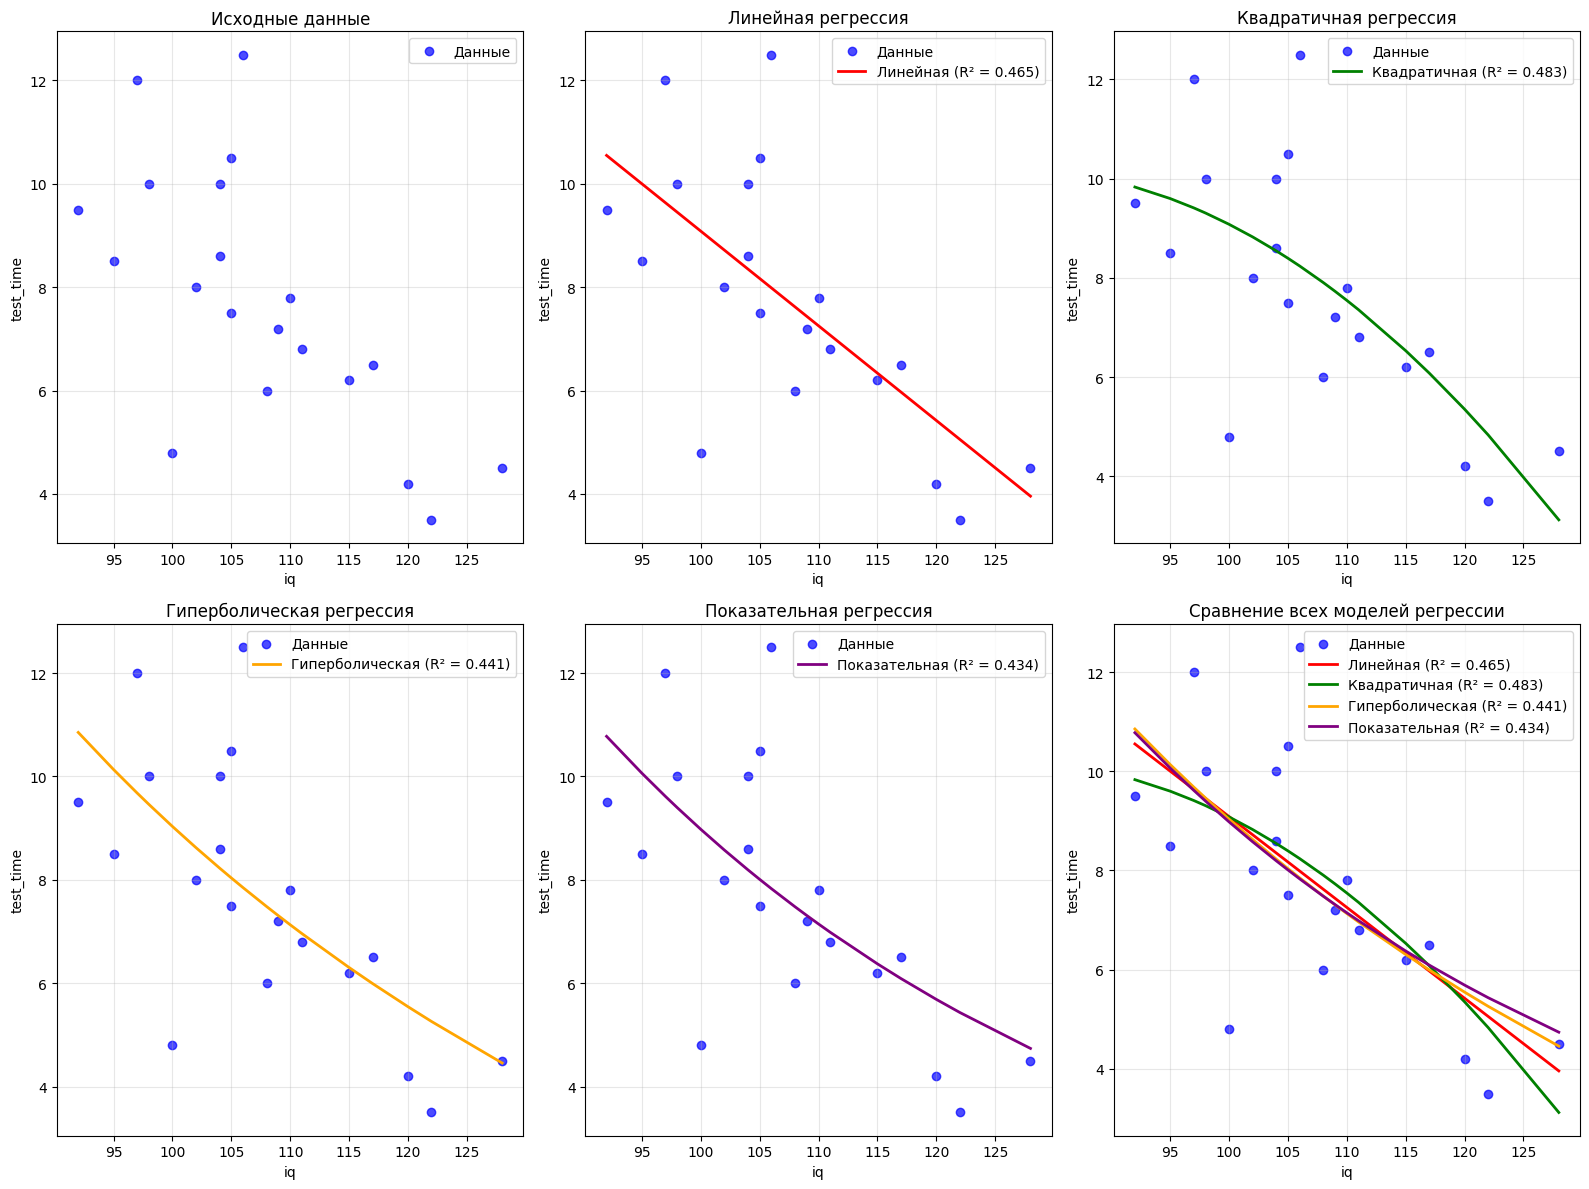

In [16]:
# ВИЗУАЛИЗАЦИЯ
plt.figure(figsize=(16, 12))

# Сортируем данные для гладких графиков
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_sorted = y[sort_idx]

# 1. Исходные данные
plt.subplot(2, 3, 1)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Исходные данные')
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Линейная регрессия
plt.subplot(2, 3, 2)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')
if linear_result['success']:
    y_linear_pred = linear_func(x_sorted, *linear_result['params'])
    plt.plot(x_sorted, y_linear_pred, 'r-', linewidth=2, 
             label=f'Линейная (R² = {linear_result["r2"]:.3f})')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Квадратичная регрессия
plt.subplot(2, 3, 3)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')
if quadratic_result['success']:
    y_quadratic_pred = quadratic_func(x_sorted, *quadratic_result['params'])
    plt.plot(x_sorted, y_quadratic_pred, 'g-', linewidth=2, 
             label=f'Квадратичная (R² = {quadratic_result["r2"]:.3f})')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Квадратичная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()

# 4. Гиперболическая регрессия
plt.subplot(2, 3, 4)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')
if hyperbolic_result.get('success'):
    x_hyper_sorted = np.sort(x_hyper)
    y_hyper_pred = hyperbolic_func(x_hyper_sorted, *hyperbolic_result['params'])
    plt.plot(x_hyper_sorted, y_hyper_pred, 'orange', linewidth=2, 
             label=f'Гиперболическая (R² = {hyperbolic_result["r2"]:.3f})')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Гиперболическая регрессия')
plt.grid(True, alpha=0.3)
plt.legend()

# 5. Показательная регрессия
plt.subplot(2, 3, 5)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')
if exponential_result.get('success'):
    x_exp_sorted = np.sort(x_exp)
    y_exp_pred = exponential_func(x_exp_sorted, *exponential_result['params'])
    plt.plot(x_exp_sorted, y_exp_pred, 'purple', linewidth=2, 
             label=f'Показательная (R² = {exponential_result["r2"]:.3f})')
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Показательная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()

# 6. Сравнение всех моделей
plt.subplot(2, 3, 6)
plt.scatter(x, y, alpha=0.7, color='blue', label='Данные')

colors = ['red', 'green', 'orange', 'purple']
models = [
    (linear_result, 'Линейная', 'linear'),
    (quadratic_result, 'Квадратичная', 'quadratic'),
    (hyperbolic_result, 'Гиперболическая', 'hyperbolic'),
    (exponential_result, 'Показательная', 'exponential')
]

for i, (result, name, func_type) in enumerate(models):
    if result.get('success'):
        if func_type == 'linear':
            y_pred = linear_func(x_sorted, *result['params'])
        elif func_type == 'quadratic':
            y_pred = quadratic_func(x_sorted, *result['params'])
        elif func_type == 'hyperbolic':
            y_pred = hyperbolic_func(np.sort(x_hyper), *result['params'])
            x_sorted_plot = np.sort(x_hyper)
        elif func_type == 'exponential':
            y_pred = exponential_func(np.sort(x_exp), *result['params'])
            x_sorted_plot = np.sort(x_exp)
        else:
            x_sorted_plot = x_sorted
        
        if func_type in ['hyperbolic', 'exponential']:
            plt.plot(x_sorted_plot, y_pred, color=colors[i], linewidth=2, 
                    label=f'{name} (R² = {result["r2"]:.3f})')
        else:
            plt.plot(x_sorted, y_pred, color=colors[i], linewidth=2, 
                    label=f'{name} (R² = {result["r2"]:.3f})')

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title('Сравнение всех моделей регрессии')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# 4


ЛУЧШАЯ МОДЕЛЬ: Квадратичная (R² = 0.4825)
ХУДШАЯ МОДЕЛЬ: Показательная (R² = 0.4337)

ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛЕЙ С ПОМОЩЬЮ F-ТЕСТА

ЛУЧШАЯ МОДЕЛЬ: Квадратичная
--------------------------------------------------
F-статистика: 7.9258
Критическое значение F(2, 17): 3.5915
P-value: 0.003699
Уровень значимости: α = 0.05
Модель СТАТИСТИЧЕСКИ ЗНАЧИМА - отвергаем H0
Модель адекватно описывает данные

Детали расчета:
  SSR (Объясненная сумма квадратов): 58.3570
  SSE (Остаточная сумма квадратов): 62.5850
  SST (Общая сумма квадратов): 120.9420
  Степени свободы: df1 = 2, df2 = 17
  Число наблюдений: n = 20
  R² (расчетный): 0.4825

ХУДШАЯ МОДЕЛЬ: Показательная
--------------------------------------------------
F-статистика: 12.6063
Критическое значение F(1, 18): 4.4139
P-value: 0.002285
Уровень значимости: α = 0.05
Модель СТАТИСТИЧЕСКИ ЗНАЧИМА - отвергаем H0
Модель адекватно описывает данные

Детали расчета:
  SSR (Объясненная сумма квадратов): 47.9685
  SSE (Остаточная сумма квадратов): 68

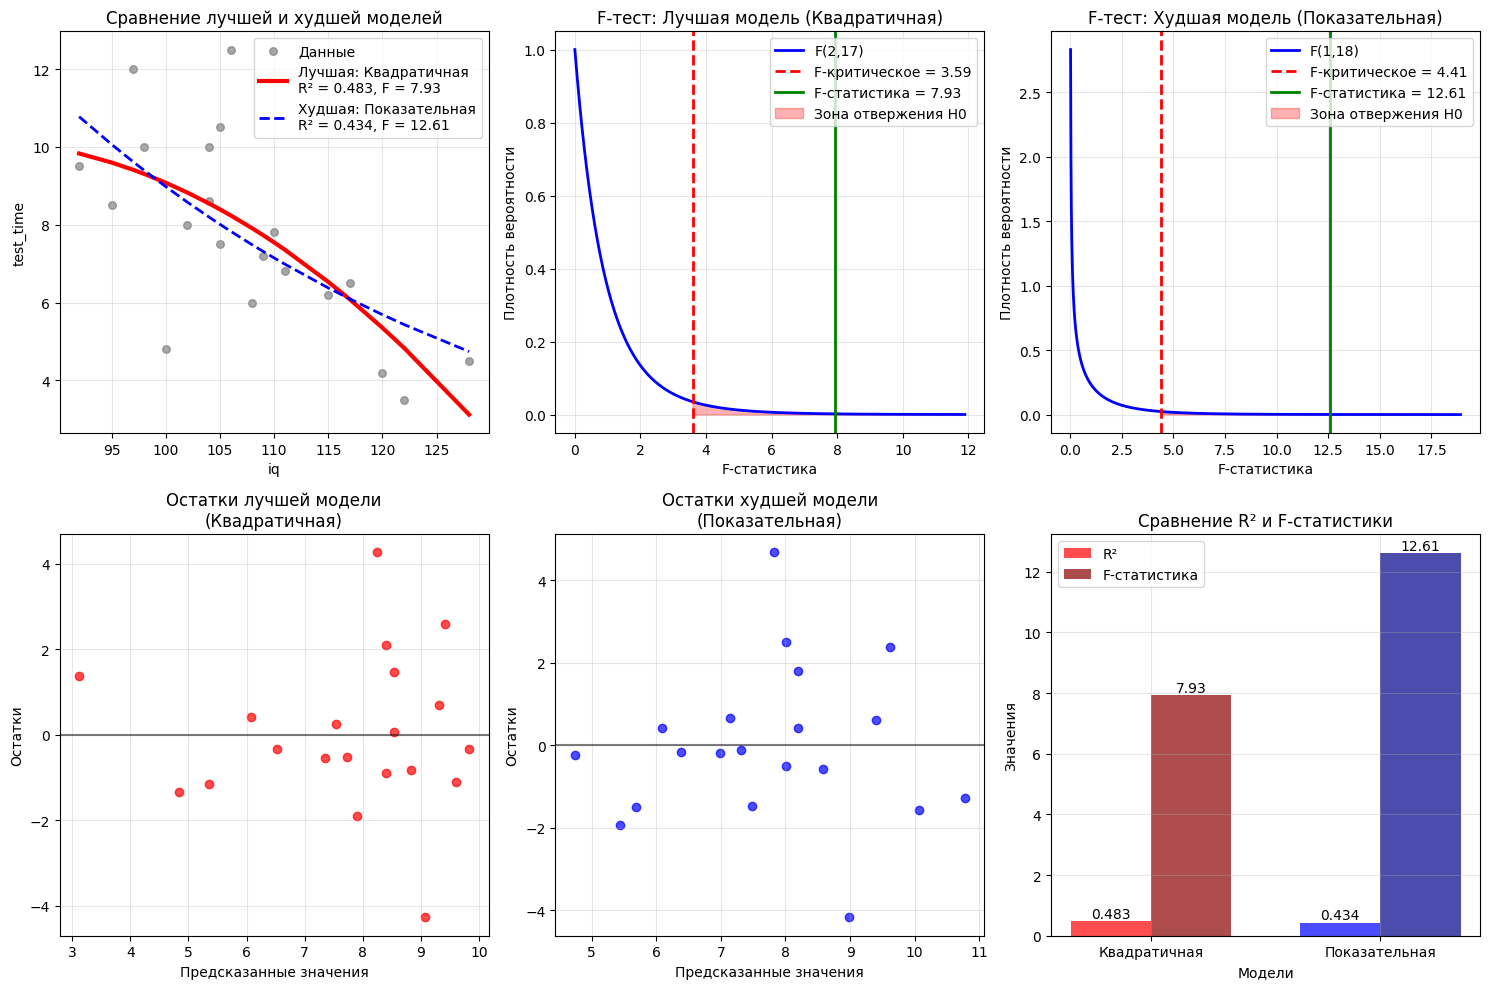

In [17]:
# ОПРЕДЕЛЯЕМ ЛУЧШУЮ И ХУДШУЮ МОДЕЛИ
if len(successful_models) >= 2:
    best_model = successful_models[0]
    worst_model = successful_models[-1]
    
    print(f"\nЛУЧШАЯ МОДЕЛЬ: {best_model['name']} (R² = {best_model['r2']:.4f})")
    print(f"ХУДШАЯ МОДЕЛЬ: {worst_model['name']} (R² = {worst_model['r2']:.4f})")
    
    # ПРОВОДИМ F-ТЕСТ ДЛЯ ЛУЧШЕЙ И ХУДШЕЙ МОДЕЛЕЙ
    print("\n" + "=" * 80)
    print("ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛЕЙ С ПОМОЩЬЮ F-ТЕСТА")
    print("=" * 80)
    
    for model, description in [(best_model, "ЛУЧШАЯ МОДЕЛЬ"), (worst_model, "ХУДШАЯ МОДЕЛЬ")]:
        print(f"\n{description}: {model['name']}")
        print("-" * 50)
        
        f_test_result = f_test(model)
        
        if f_test_result:
            print(f"F-статистика: {f_test_result['F_statistic']:.4f}")
            print(f"Критическое значение F({f_test_result['df1']}, {f_test_result['df2']}): {f_test_result['F_critical']:.4f}")
            print(f"P-value: {f_test_result['p_value']:.6f}")
            print(f"Уровень значимости: α = 0.05")
            
            if f_test_result['is_significant']:
                print("Модель СТАТИСТИЧЕСКИ ЗНАЧИМА - отвергаем H0")
                print("Модель адекватно описывает данные")
            else:
                print("Модель НЕ ЗНАЧИМА - не отвергаем H0")
                print("Модель не адекватно описывает данные")
            
            print(f"\nДетали расчета:")
            print(f"  SSR (Объясненная сумма квадратов): {f_test_result['SSR']:.4f}")
            print(f"  SSE (Остаточная сумма квадратов): {f_test_result['SSE']:.4f}")
            print(f"  SST (Общая сумма квадратов): {f_test_result['SST']:.4f}")
            print(f"  Степени свободы: df1 = {f_test_result['df1']}, df2 = {f_test_result['df2']}")
            print(f"  Число наблюдений: n = {f_test_result['n']}")
            
            # Коэффициент детерминации через суммы квадратов
            r2_calculated = f_test_result['SSR'] / f_test_result['SST']
            print(f"  R² (расчетный): {r2_calculated:.4f}")
    
    # СРАВНИТЕЛЬНЫЙ АНАЛИЗ
    print("\n" + "=" * 80)
    print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ ЛУЧШЕЙ И ХУДШЕЙ МОДЕЛЕЙ")
    print("=" * 80)
    
    best_f_test = f_test(best_model)
    worst_f_test = f_test(worst_model)
    
    if best_f_test and worst_f_test:
        comparison_data = []
        
        for model, f_res, status in [(best_model, best_f_test, "Лучшая"), (worst_model, worst_f_test, "Худшая")]:
            comparison_data.append({
                'Модель': f"{status}: {model['name']}",
                'R²': model['r2'],
                'F-статистика': f_res['F_statistic'],
                'F-критическое': f_res['F_critical'],
                'P-value': f_res['p_value'],
                'Значимость': 'Значима' if f_res['is_significant'] else 'Не значима'
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
        
        # ВЫВОДЫ
        print("\nВЫВОДЫ:")
        if best_f_test['is_significant'] and worst_f_test['is_significant']:
            print("• Обе модели статистически значимы")
            print(f"• Лучшая модель ({best_model['name']}) имеет более высокую объясняющую способность (R² = {best_model['r2']:.4f})")
        elif best_f_test['is_significant'] and not worst_f_test['is_significant']:
            print(f"• Только лучшая модель ({best_model['name']}) статистически значима")
            print(f"• Худшая модель ({worst_model['name']}) не адекватно описывает данные")
        elif not best_f_test['is_significant'] and not worst_f_test['is_significant']:
            print("• Ни одна из моделей не является статистически значимой")
            print("• Рассмотрите другие типы моделей или проверьте данные")
        else:
            print("• Неожиданный результат - требуется дополнительный анализ")
    
    # ВИЗУАЛИЗАЦИЯ F-ТЕСТА
    plt.figure(figsize=(15, 10))
    
    # 1. Сравнение моделей
    plt.subplot(2, 3, 1)
    x_sorted = np.sort(x)
    
    plt.scatter(x, y, alpha=0.7, color='gray', label='Данные', s=30)
    
    # Лучшая модель
    if best_model['name'] in ['Линейная', 'Квадратичная', 'Гиперболическая', 'Показательная']:
        y_best_pred = best_model['func'](x_sorted, *best_model['params'])
        plt.plot(x_sorted, y_best_pred, 'r-', linewidth=3, 
                label=f'Лучшая: {best_model["name"]}\nR² = {best_model["r2"]:.3f}, F = {best_f_test["F_statistic"]:.2f}')
    
    # Худшая модель  
    if worst_model['name'] in ['Линейная', 'Квадратичная', 'Гиперболическая', 'Показательная']:
        y_worst_pred = worst_model['func'](x_sorted, *worst_model['params'])
        plt.plot(x_sorted, y_worst_pred, 'b--', linewidth=2, 
                label=f'Худшая: {worst_model["name"]}\nR² = {worst_model["r2"]:.3f}, F = {worst_f_test["F_statistic"]:.2f}')
    
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('Сравнение лучшей и худшей моделей')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. F-распределение для лучшей модели
    plt.subplot(2, 3, 2)
    if best_f_test:
        df1, df2 = best_f_test['df1'], best_f_test['df2']
        F_stat = best_f_test['F_statistic']
        F_crit = best_f_test['F_critical']
        
        # Генерируем точки для F-распределения
        x_f = np.linspace(0, max(F_stat * 1.5, F_crit * 1.5), 1000)
        y_f = stats.f.pdf(x_f, df1, df2)
        
        plt.plot(x_f, y_f, 'b-', linewidth=2, label=f'F({df1},{df2})')
        plt.axvline(F_crit, color='red', linestyle='--', linewidth=2, label=f'F-критическое = {F_crit:.2f}')
        plt.axvline(F_stat, color='green', linestyle='-', linewidth=2, label=f'F-статистика = {F_stat:.2f}')
        
        # Зона отвержения
        x_reject = np.linspace(F_crit, max(x_f), 100)
        y_reject = stats.f.pdf(x_reject, df1, df2)
        plt.fill_between(x_reject, y_reject, alpha=0.3, color='red', label='Зона отвержения H0')
        
        plt.xlabel('F-статистика')
        plt.ylabel('Плотность вероятности')
        plt.title(f'F-тест: Лучшая модель ({best_model["name"]})')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 3. F-распределение для худшей модели
    plt.subplot(2, 3, 3)
    if worst_f_test:
        df1, df2 = worst_f_test['df1'], worst_f_test['df2']
        F_stat = worst_f_test['F_statistic']
        F_crit = worst_f_test['F_critical']
        
        # Генерируем точки для F-распределения
        x_f = np.linspace(0, max(F_stat * 1.5, F_crit * 1.5), 1000)
        y_f = stats.f.pdf(x_f, df1, df2)
        
        plt.plot(x_f, y_f, 'b-', linewidth=2, label=f'F({df1},{df2})')
        plt.axvline(F_crit, color='red', linestyle='--', linewidth=2, label=f'F-критическое = {F_crit:.2f}')
        plt.axvline(F_stat, color='green', linestyle='-', linewidth=2, label=f'F-статистика = {F_stat:.2f}')
        
        # Зона отвержения
        x_reject = np.linspace(F_crit, max(x_f), 100)
        y_reject = stats.f.pdf(x_reject, df1, df2)
        plt.fill_between(x_reject, y_reject, alpha=0.3, color='red', label='Зона отвержения H0')
        
        plt.xlabel('F-статистика')
        plt.ylabel('Плотность вероятности')
        plt.title(f'F-тест: Худшая модель ({worst_model["name"]})')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # 4. Остатки лучшей модели
    plt.subplot(2, 3, 4)
    if best_model['success']:
        y_best_pred_full = best_model['func'](best_model['x_data'], *best_model['params'])
        residuals_best = best_model['y_data'] - y_best_pred_full
        
        plt.scatter(y_best_pred_full, residuals_best, alpha=0.7, color='red')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        plt.xlabel('Предсказанные значения')
        plt.ylabel('Остатки')
        plt.title(f'Остатки лучшей модели\n({best_model["name"]})')
        plt.grid(True, alpha=0.3)
    
    # 5. Остатки худшей модели
    plt.subplot(2, 3, 5)
    if worst_model['success']:
        y_worst_pred_full = worst_model['func'](worst_model['x_data'], *worst_model['params'])
        residuals_worst = worst_model['y_data'] - y_worst_pred_full
        
        plt.scatter(y_worst_pred_full, residuals_worst, alpha=0.7, color='blue')
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        plt.xlabel('Предсказанные значения')
        plt.ylabel('Остатки')
        plt.title(f'Остатки худшей модели\n({worst_model["name"]})')
        plt.grid(True, alpha=0.3)
    
    # 6. Сравнение качества моделей
    plt.subplot(2, 3, 6)
    models_names = [best_model['name'], worst_model['name']]
    r2_values = [best_model['r2'], worst_model['r2']]
    f_values = [best_f_test['F_statistic'] if best_f_test else 0, 
                worst_f_test['F_statistic'] if worst_f_test else 0]
    
    x_pos = np.arange(len(models_names))
    width = 0.35
    
    bars1 = plt.bar(x_pos - width/2, r2_values, width, label='R²', alpha=0.7, color=['red', 'blue'])
    bars2 = plt.bar(x_pos + width/2, f_values, width, label='F-статистика', alpha=0.7, color=['darkred', 'darkblue'])
    
    plt.xlabel('Модели')
    plt.ylabel('Значения')
    plt.title('Сравнение R² и F-статистики')
    plt.xticks(x_pos, models_names)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, value in zip(bars1, r2_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom')
    
    for bar, value in zip(bars2, f_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()